(1280, 617)


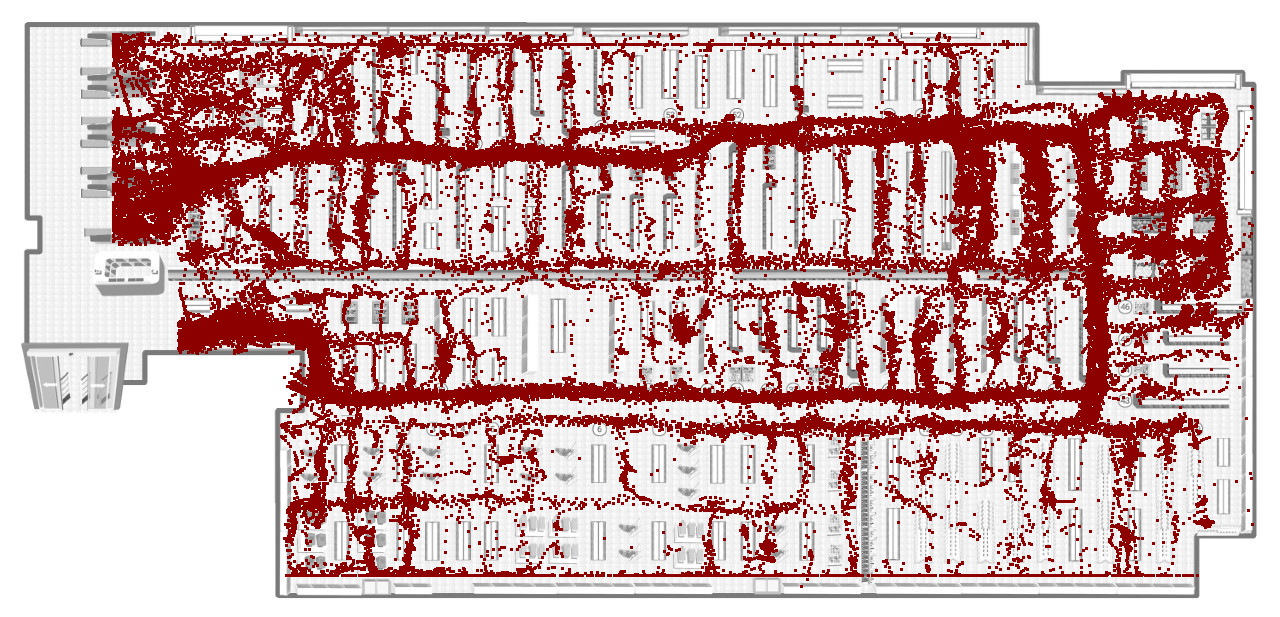

In [1]:
# %matplotlib inline
from PIL import Image, ImageDraw
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output
import pandas as pd
import pymysql

# Lisää tämä osio saadaksesi tietokantayhteyden tiedostosta
from database_connection import create_conn

def draw(df):
    # Get image size with this method
    img = Image.open('./kauppa.jpg')
    width, height = img.size
    print(img.size)

    # Create image widget
    file = open("./kauppa.jpg", "rb")
    image = file.read()
    widgets.Image(
        value=image,
        format='png',
        width=width,
        height=height,
    )

    # Draw on image
    d = ImageDraw.Draw(img)

    # Calibration of coordinates
    x_offset = 112  # x offset
    y_offset = 27   # y offset
    x_max = 1076;  # node_x_max = 10406
    y_max = 563;  # node_y_max = 5220
    x_scale = 1140/10406
    y_scale = 566/5220

    def scale_coords(x,y):
        xr = (x*x_scale)+x_offset
        yr = (y*y_scale)+y_offset
        zr = 0
        return xr, yr, zr

    for index, row in df.iterrows():
        (x,y,z) = scale_coords(row.x, row.y)
        #d.point((x,y), fill=(255,100,100,255))#, outline ="green")
        d.rectangle((x,y,x+2,y+2), fill=(int(row.sensor_id)%255,0,0,20))#, outline ="green")

    display(img)

def clear():
    clear_output(wait=True)

# Muuta tätä osiota, jotta se käyttää MariaDB-tietokantayhteyttä
conn = create_conn()
query = "SELECT * FROM SensorData LIMIT 200000"  # Korvaa table_name oikealla taulun nimellä

with conn.cursor() as cursor:
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [i[0] for i in cursor.description]
    df = pd.DataFrame(result, columns=columns)

conn.close()

# Kutsu draw-funktiota
draw(df)